In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [11]:
ad = pd.read_csv('data/adMeans.txt', header=None)
ad.rename(columns={0 : 'freq'}, inplace=True)
game = pd.read_csv('data/gameMeans.txt', header=None)
game.rename(columns={0 : 'freq'}, inplace=True)
ad['classification'] = 'ad'
game['classification'] = 'game'
all_points = pd.concat([ad, game])

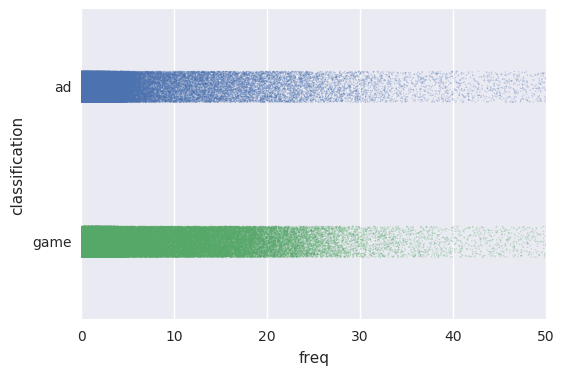

In [15]:
sns.stripplot(data=all_points, x="freq", y="classification", jitter=True, size=1, alpha=0.3)
plt.xlim([0, 50])
plt.show()

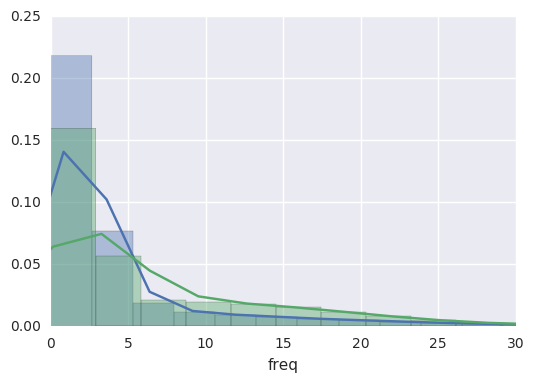

In [24]:
sns.distplot(all_points[ all_points['classification'] == 'ad' ]['freq'], bins=100)
sns.distplot(all_points[ all_points['classification'] == 'game' ]['freq'], bins=100)

plt.xlim([0, 30])
plt.show()

A decent next step would be to normalize each signal and then take a variety of summary calculations like median, standard deviation etc and see if that helps separate the data a bit